# Dự án: Phân tích Dataset "Football Stadiums" (Kaggle)

CSC17104 – Lập trình cho Khoa học Dữ liệu

## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FILE = 'spotify_data_clean.csv'

df = pd.read_csv(FILE)

In [3]:
df.dtypes

track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object

## 2. Data Exploration (Khung phân tích)

### 2.2 Phân tích biến số số (numerical)  
1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)
- Hình dạng phân bố dữ liệu là gì? (bình thường, lệch, hai đỉnh, đồng đều)
- Trực quan hóa dữ liệu: histogram, box plot, density plot,...
- Tính toán: trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation)
2. Phạm vi & Giá trị ngoại lai (Range & Outliers)
- Giá trị nhỏ nhất và lớn nhất là bao nhiêu?
- Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?
- Xác định giá trị ngoại lai bằng box plot, phương pháp IQR hoặc z-score
- Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?
3. Data Quality
- Tỷ lệ giá trị bị thiếu là bao nhiêu phần trăm?
- Có giá trị không thể xảy ra không? (ví dụ: tuổi âm, giá = 0,...)
- Có giá trị thay thế (placeholder) nào được dùng để biểu thị dữ liệu thiếu không? (ví dụ: 999, -1, 0, …)

In [4]:
num_cols = ['track_number','track_popularity','artist_popularity','artist_followers','album_total_tracks','track_duration_min']

1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)

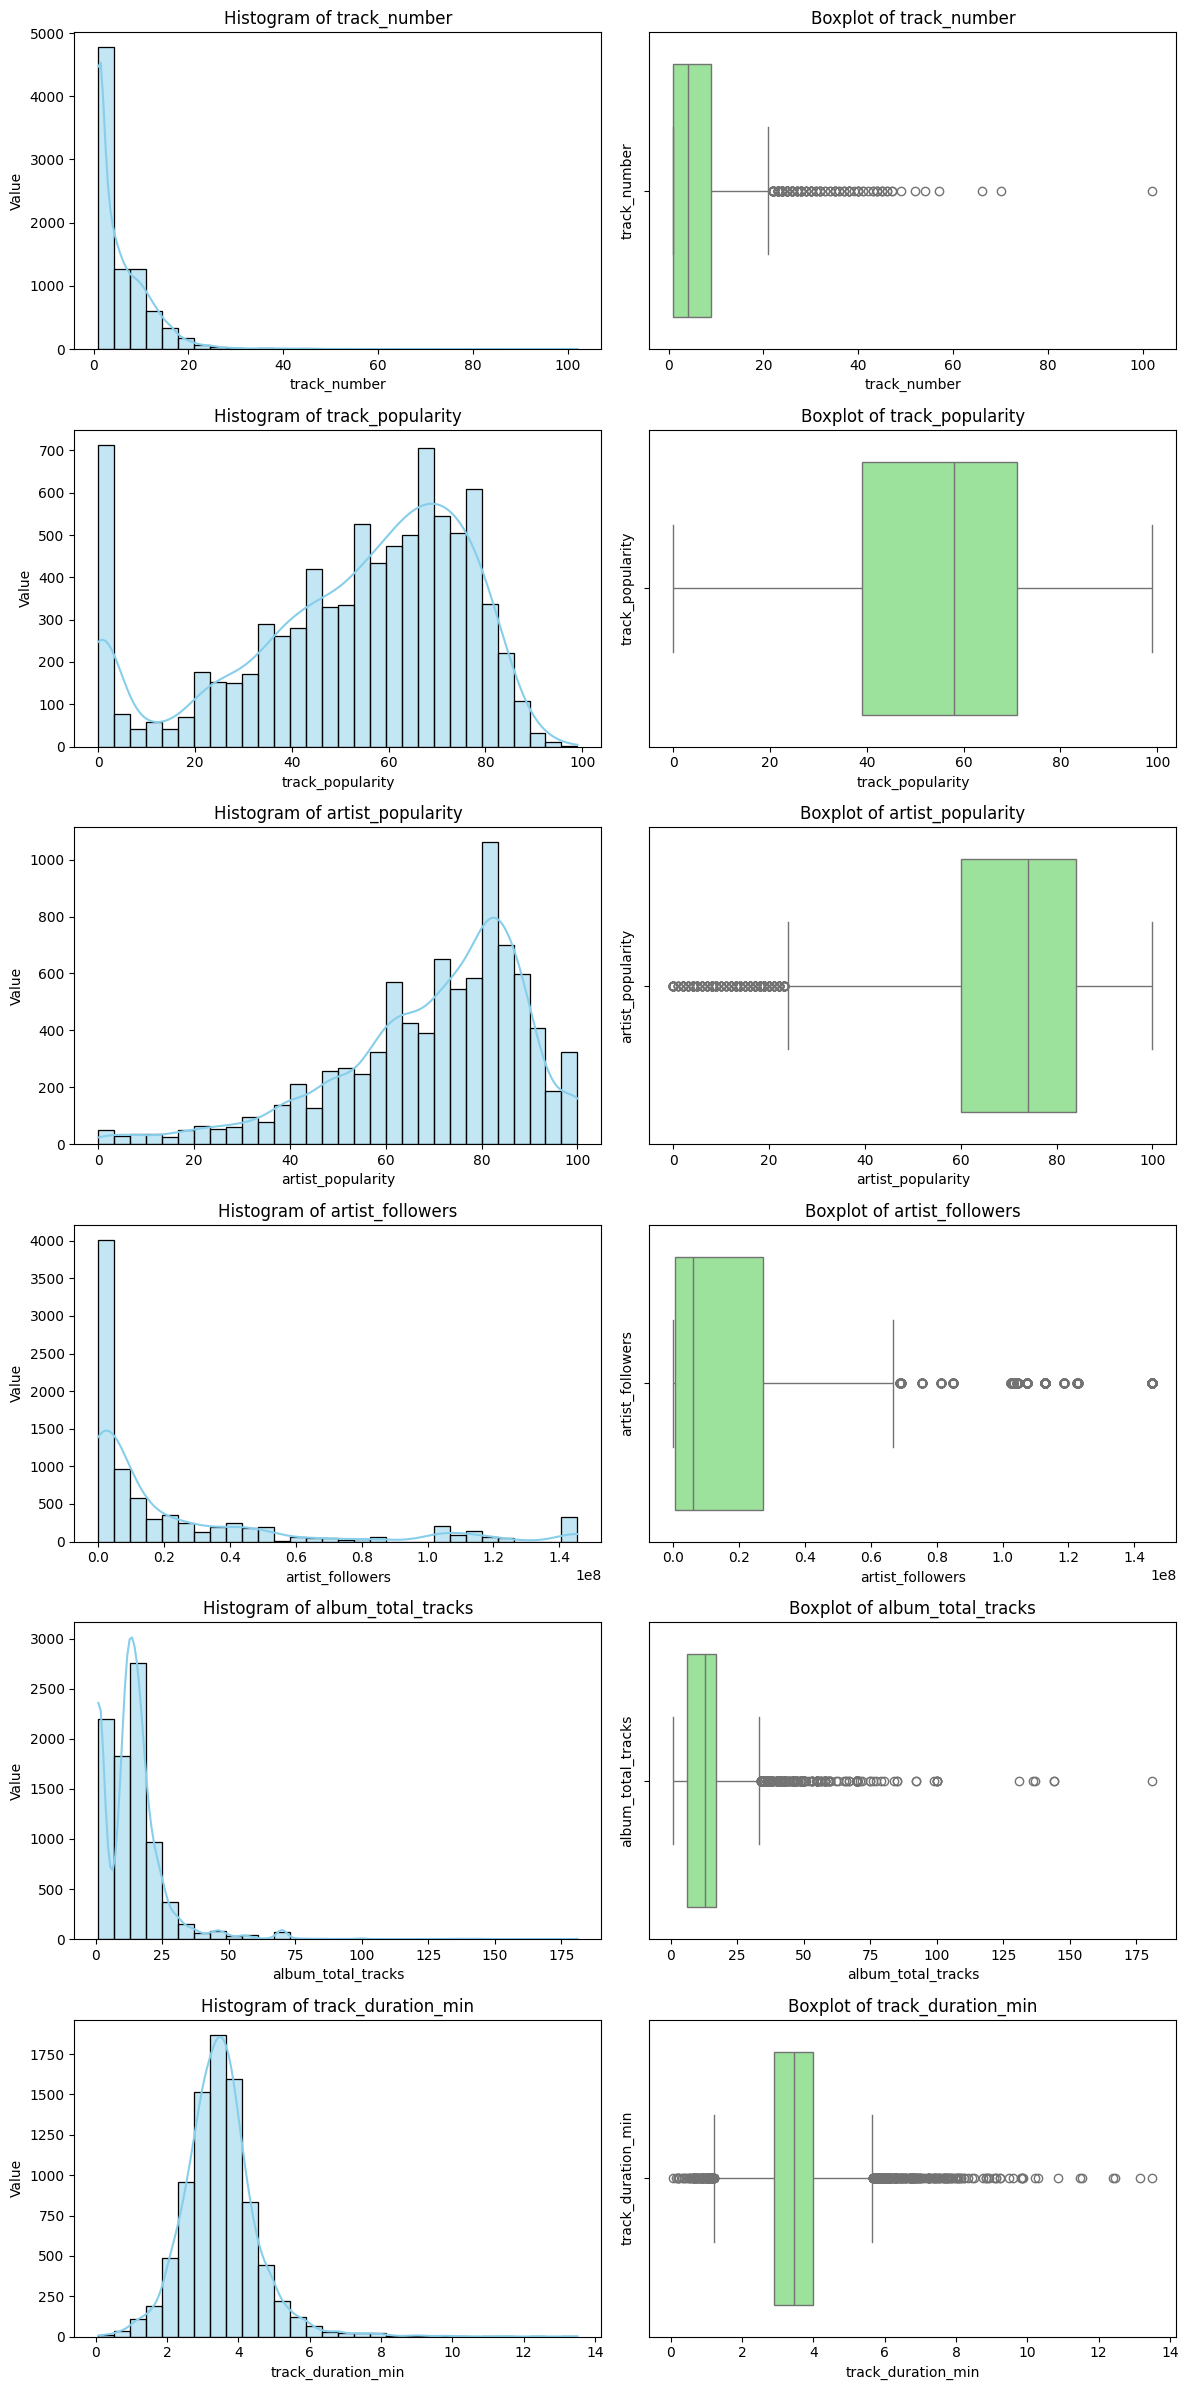

In [5]:
# Hình dạng phân bố dữ liệu là gì?
# Trực quan hóa dữ liệu: histogram, box plot, density plot,...

# Số cột
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(12,4*n_cols))

for i, col in enumerate(num_cols):
    # Histplot
    sns.histplot(df[col], kde = True, bins =30, color ='skyblue', ax = axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Value')
    
    # Boxplot
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')
    axes[i,1].set_ylabel(col)
    
plt.tight_layout()
plt.show()

In [6]:
# Tính toán: trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation)
# Dictionary để lưu mean, median, std
dist_dict = {}
for col in num_cols:
    dist_dict[col] = {
        'mean': df[col].mean(),
        'median':df[col].median(),
        'std':df[col].std()
    }
# Chuyển thành dataframe
dist_df = pd.DataFrame(dist_dict).T
dist_df = dist_df.round(2)
dist_df

,mean,median,std
track_number,5.77,4.00,6.05
track_popularity,52.36,58.00,23.82
artist_popularity,69.73,74.00,19.65
artist_followers,24034719.33,6105547.00,38031804.96
album_total_tracks,13.79,13.00,11.89
track_duration_min,3.49,3.44,1.06


2. Range & Outliers:

In [7]:
# Giá trị nhỏ nhất và lớn nhất là bao nhiêu?
# Dictionary để lưu max, min
range_dict = {}
for col in num_cols:
    range_dict[col] = {
        'min': df[col].min(),
        'max':df[col].max()
    }
# Chuyển thành dataframe
range_df = pd.DataFrame(range_dict).T
pd.options.display.float_format = '{:.2f}'.format
range_df

,min,max
track_number,1.00,102.00
track_popularity,0.00,99.00
artist_popularity,0.00,100.00
artist_followers,0.00,145542136.00
album_total_tracks,1.00,181.00
track_duration_min,0.07,13.51


Câu hỏi: Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
>Trả lời: Các giá trị min/max hợp lý.

In [8]:
# Xác định giá trị ngoại lai bằng IQR
def detect_outliers(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    num_outliers = outliers.shape[0]
    return lower_bound, upper_bound, num_outliers

outlier_dict = {}
for col in num_cols:
    lower, upper, count = detect_outliers(col)
    outlier_dict[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'number_outliers': count
    }

# Chuyển thành dataframe
outlier_df = pd.DataFrame(outlier_dict).T           
outlier_df

,lower_bound,upper_bound,number_outliers
track_number,-11.00,21.00,166.00
track_popularity,-9.00,119.00,0.00
artist_popularity,24.00,120.00,286.00
artist_followers,-39723026.50,67437897.50,1044.00
album_total_tracks,-10.50,33.50,379.00
track_duration_min,1.21,5.66,358.00


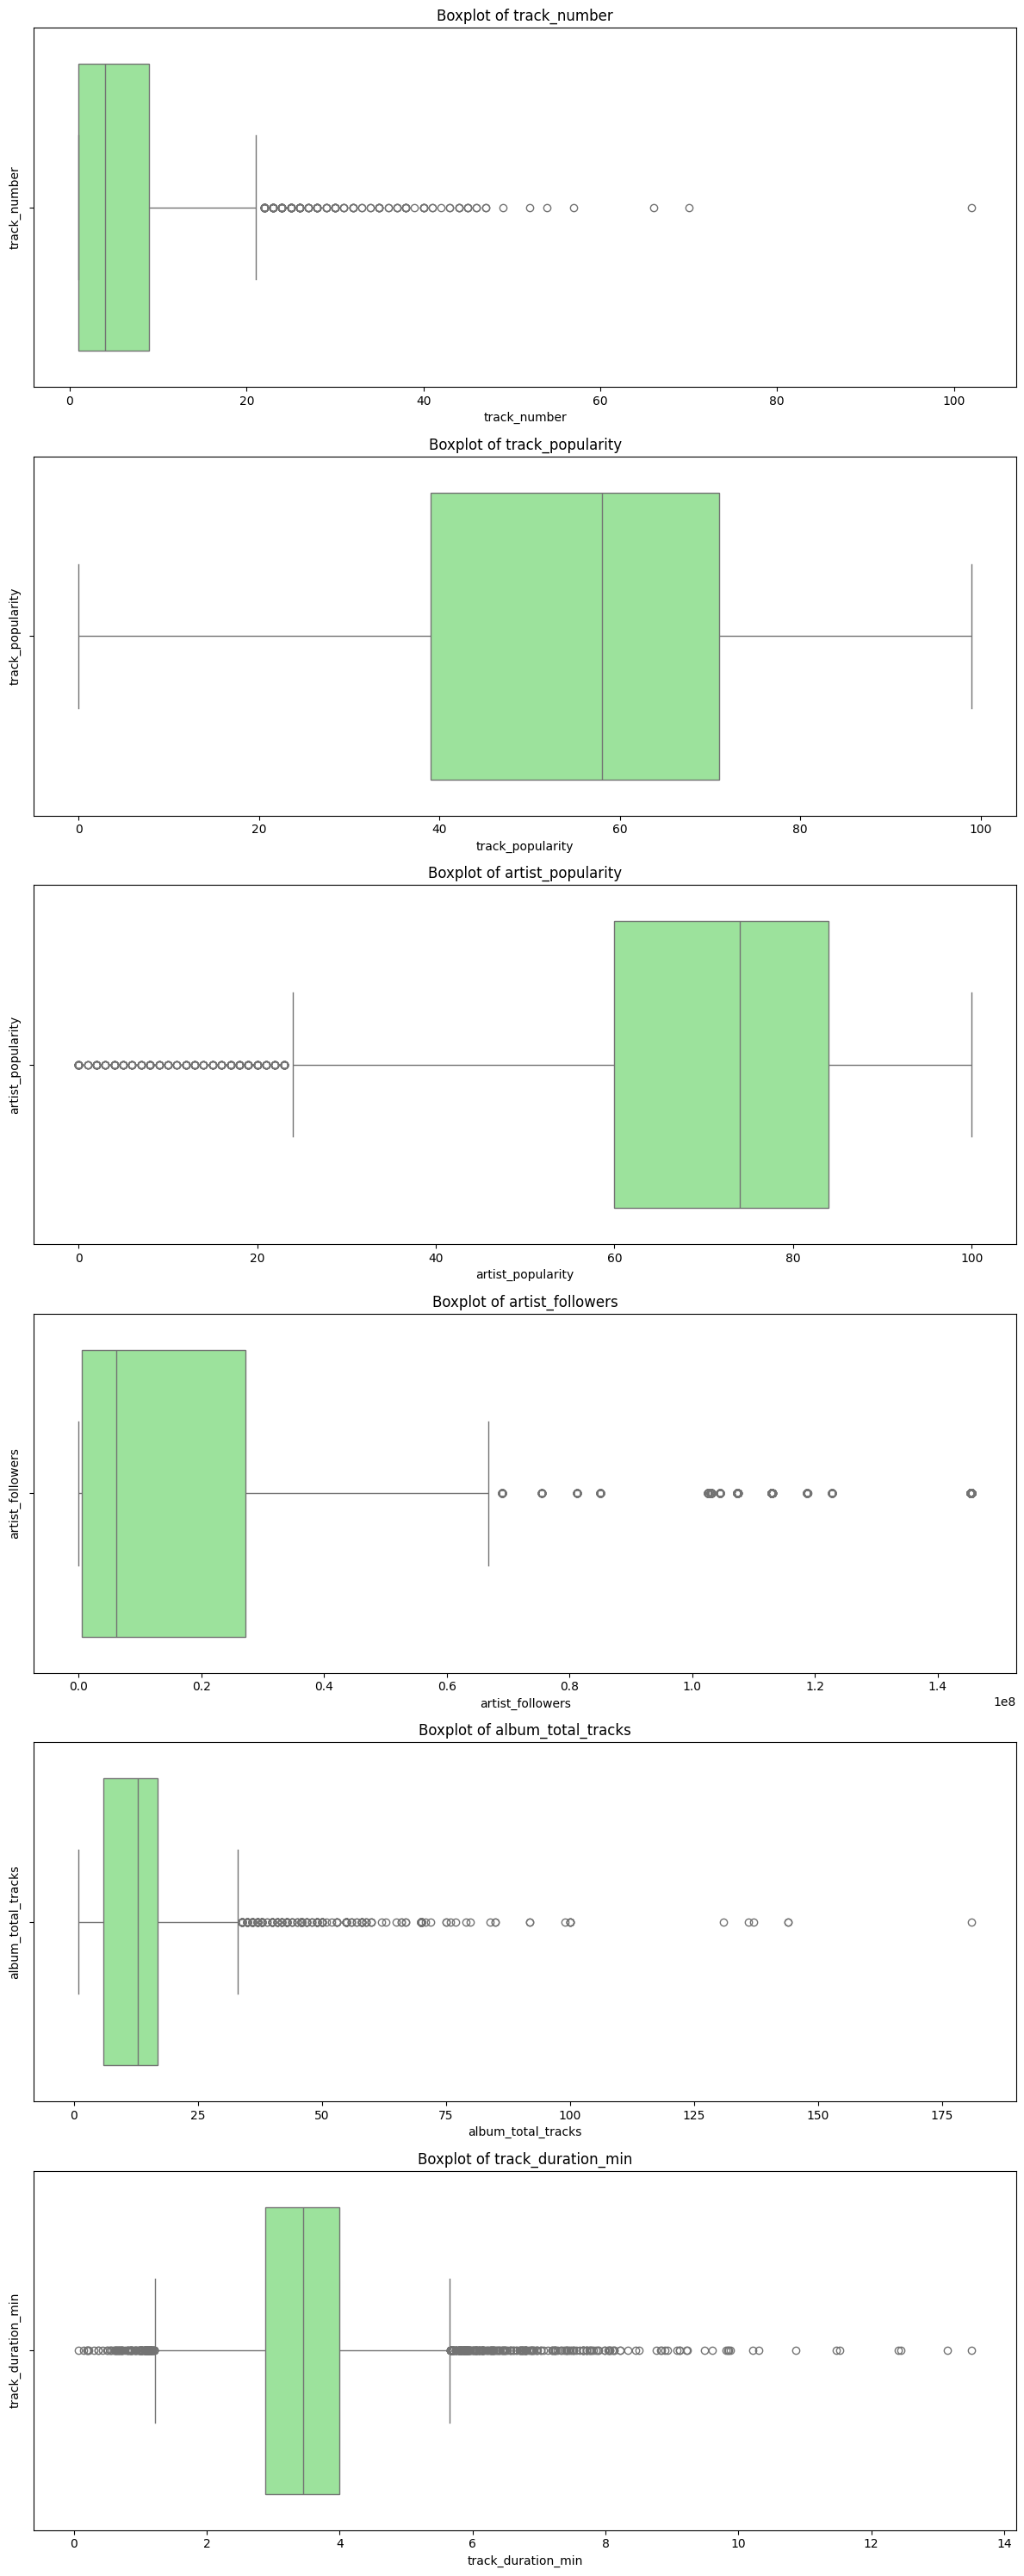

In [9]:
# Xác định giá trị ngoại lai bằng boxplot
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(12,5*n_cols))

for i, col in enumerate(num_cols):
    # Boxplot
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

Câu hỏi: Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
>Trả lời: Các giá trị ngoại lai là hợp lí (vì max, min hợp lí)

3. Data Quality:

In [10]:
# Phần trăm dữ liệu bị thiếu?
miss_dict = {}

for col in num_cols:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_number,0.00,0.00
track_popularity,0.00,0.00
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
album_total_tracks,0.00,0.00
track_duration_min,0.00,0.00


In [11]:
# Có giá trị không thể xảy ra không? (ví dụ: tuổi âm, giá = 0, sức chứa âm, …)

# Lọc ra các giá trị âm
invalid_mask = (df[num_cols] < 0).any(axis=1)

if(df[invalid_mask].empty):
    print('Không có giá trị không hợp lệ')
else:
    print('Giá trị không hợp lệ')
    df[invalid_mask]

Không có giá trị không hợp lệ


In [12]:
# Có giá trị thay thế (placeholder) nào được dùng để biểu thị dữ liệu thiếu không? (ví dụ: 999, -1, …)
placeholders = [-1,999,9999]
placeholder_mask = df[num_cols].isin(placeholders)

placeholder_counts = placeholder_mask.sum().sum()

print("Số lượng giá trị thay thế: ", placeholder_counts)

Số lượng giá trị thay thế:  0


### 2.4 Missing Data  
1. Đánh giá tổng quan:
- Tạo bảng thống kê giá trị thiếu (missing values): gồm tên cột, số lượng bị thiếu và phần trăm bị thiếu.
- Trực quan hóa mẫu hình dữ liệu bị thiếu bằng biểu đồ (heatmap hoặc bar chart).
- Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật:
    - Có nhóm hàng (rows) hoặc nhóm đặc trưng nào có nhiều giá trị thiếu hơn không?
2. Chiến lược xử lý theo từng cột:
- Với mỗi cột có giá trị bị thiếu:
    - Giải thích vì sao dữ liệu bị thiếu?
(ngẫu nhiên, không áp dụng cho trường hợp đó, lỗi thu thập dữ liệu,…)
    - Kế hoạch xử lý: (xoá giá trị thiếu, điền giá trị thay thế – impute, hoặc giữ chúng như một nhóm riêng biệt)

1. Đánh giá tổng quan:

In [13]:
# Tạo bảng thống kê giá trị thiếu (missing values): gồm tên cột, số lượng bị thiếu và phần trăm bị thiếu.
miss_dict = {}

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent':missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_id,0.00,0.00
track_name,0.00,0.00
track_number,0.00,0.00
track_popularity,0.00,0.00
explicit,0.00,0.00
artist_name,3.00,0.03
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
artist_genres,3361.00,39.16
album_id,0.00,0.00


Text(0.5, 1.0, 'Missing value heatmap')

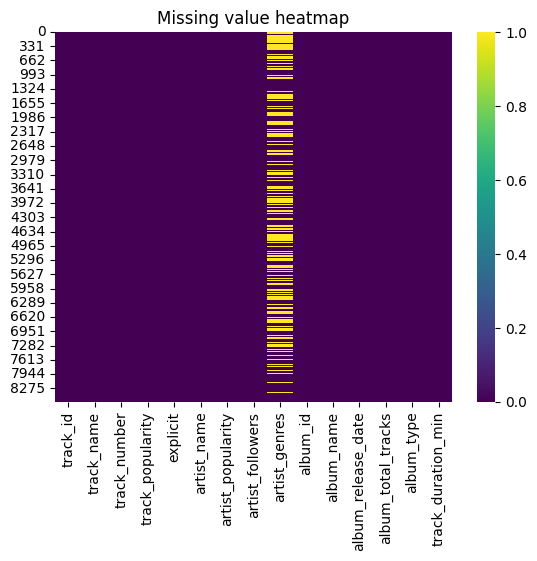

In [14]:
# Trực quan hóa mẫu hình dữ liệu bị thiếu bằng biểu đồ (heatmap hoặc bar chart).
sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing value heatmap')

Câu hỏi: Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật?  
>Trả lời: Tập trung `artist_genres` và ngẫu nhiên tại `artist_name`

2. Chiến lược xử lý theo từng cột:

Với mỗi cột có giá trị bị thiếu:
- Giải thích vì sao dữ liệu bị thiếu?
  - Data collection issues: Dữ liệu thu thập từ các nguồn không trả về genre cho một số artist.
  - Not applicable: artist mới, chưa phân loại genre.
  - Random: tại cột `artist_name`
- Kế hoạch xử lý:
  - Đối với `artist_genres`: Giữ cột và điền "Unknown".
  - Đối với `artist_name`: Vì khi train model sẽ xóa cột, nên điền giá trị bằng "Unknown".

## 2.6 Initial Observations & Insights
1. Tóm tắt
- Tóm tắt các điểm nổi bật:
  - Bộ dữ liệu chứa thông tin hơn 8.000 bài hát, phân bố trên nhiều nghệ sĩ, album và thể loại nhạc khác nhau, tạo điều kiện phân tích đa dạng về âm nhạc và hành vi nghe nhạc.
  - Các trường dữ liệu cơ bản đều được điền đầy đủ (ngoại trừ `artist_genres` với tỉ lệ thiếu là $39$ %), bao gồm thông tin về track, artist, album, popularity, explicit → thuận lợi cho xử lý và phân tích thống kê.
- Vấn đề chất lượng dữ liệu đã phát hiện:
  - Thiếu thông tin thể loại nhạc (artist_genres) -> cần gán mặc định "Unknown".
  - Không có missing value ở các cột số (`track_popularity`, `artist_popularity`, `artist_followers`,`album_total_tracks`, `track_duration_min`) -> thuận lợi cho phân tích định lượng.
- Các bước tiền xử lý cần thiết:
  - Điền missing value cho `artist_genres` và `artist_name` bằng "Unknown".
- Các mẫu hình thú vị dẫn đến câu hỏi nghiên cứu:
  - Mối quan hệ giữa popularity và đặc điểm nghệ sĩ.
  - Các yếu tố ảnh hưởng đến `track_popularity`.

2. Cảnh báo dữ liệu (Red Flags)
- Các vấn đề nghiêm trọng về chất lượng dữ liệu:
  - `artist_genres` bị thiếu khoảng 39% → ảnh hưởng khi phân tích theo thể loại nhạc hoặc nhóm nghệ sĩ.
  - Dữ liệu lệch trái đối với các cột `track_number`, `artist_followers`, `album_total_tracks`
- Các hạn chế có thể ảnh hưởng đến phân tích:
  - `artist_followers` và `track_popularity` có thể thay đổi theo thời gian -> dữ liệu là snapshot tại một thời điểm, không phản ánh thay đổi thực tế.
  - Không có thông tin về quốc gia phát hành hoặc khu vực địa lý -> không thể phân tích sự khác biệt vùng miền hoặc quốc tế.